## GRIP - The Sparks Foundation

## Data Science & Business Analytics

## Task - Prediction using Supervised ML

## Simple Linear Regression

In this task, we need to predict the percentage of marks of a student based upon the number of hours they studied.

## Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data

This data contains percentage of an student based on the number of study hours.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [3]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Exploring the Data Analysis and Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<AxesSubplot:xlabel='Hours', ylabel='Scores'>

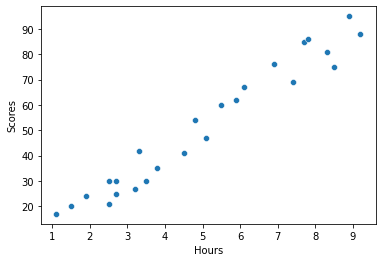

In [6]:
sns.scatterplot(x='Hours',y='Scores',data=df)

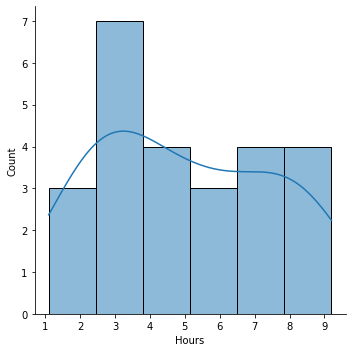

In [7]:
sns.displot(data=df['Hours'],kde=True)

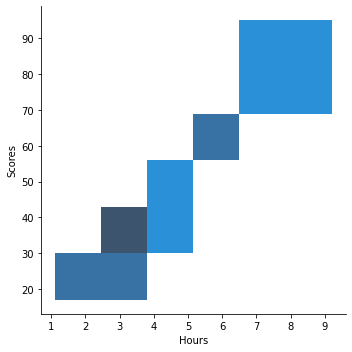

In [8]:
sns.displot(x='Hours',y='Scores',data=df)

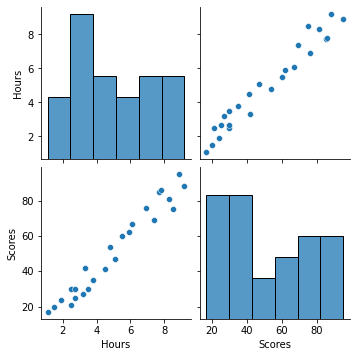

In [9]:
sns.pairplot(df)

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

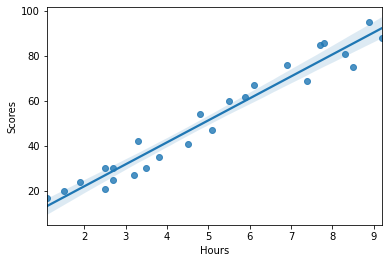

In [10]:
sns.regplot(x='Hours',y='Scores',data=df)

In [11]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:>

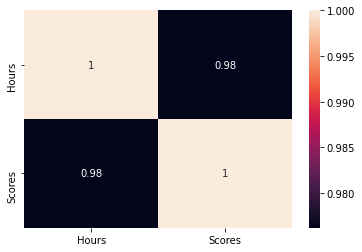

In [12]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

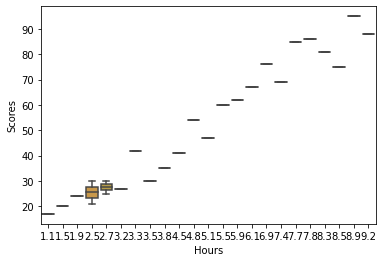

In [13]:
sns.boxplot(x='Hours',y='Scores',data=df)

## Train | Test and Split

In [14]:
X = df.drop('Scores',axis=1)

In [15]:
y = df['Scores']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [18]:
print(X_train)

    Hours
1     5.1
14    1.1
18    6.1
0     2.5
12    4.5
5     1.5
23    6.9
20    2.7
4     3.5
8     8.3
13    3.3
9     2.7
15    8.9
24    7.8
6     9.2
17    1.9
11    5.9


In [19]:
print(y_train)

1     47
14    17
18    67
0     21
12    41
5     20
23    76
20    30
4     30
8     81
13    42
9     25
15    95
24    86
6     88
17    24
11    62
Name: Scores, dtype: int64


In [20]:
print(X_test)

    Hours
16    2.5
10    7.7
22    3.8
19    7.4
7     5.5
21    4.8
2     3.2
3     8.5


In [21]:
print(y_test)

16    30
10    85
22    35
19    69
7     60
21    54
2     27
3     75
Name: Scores, dtype: int64


## Linear Regression Model

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model = LinearRegression()

In [24]:
model.fit(X_train,y_train)

LinearRegression()

After building the model. 
## Prediction

In [25]:
predictions = model.predict(X_test)

In [26]:
print(predictions)

[27.01878177 78.84466226 39.97525189 75.85470762 56.91832821 49.94176737
 33.99534261 86.81787465]


## Model performance

In [27]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [28]:
absolute_error = mean_absolute_error(y_test,predictions)

In [29]:
absolute_error

5.864954643694258

In [30]:
print("Mean Avsolute Error - {}".format(absolute_error))

Mean Avsolute Error - 5.864954643694258


In [31]:
mse = mean_squared_error(y_test,predictions)

In [32]:
print("Mean Squared Error - {}".format(mse))

Mean Squared Error - 41.63486564552886


In [33]:
rmse = np.sqrt(mse)

In [34]:
print("Root Mean Squared Error - {}".format(rmse))

Root Mean Squared Error - 6.452508476982333


## Final Model 
Model training on complete data

In [35]:
final_model = LinearRegression()

In [36]:
final_model.fit(X,y)

LinearRegression()

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

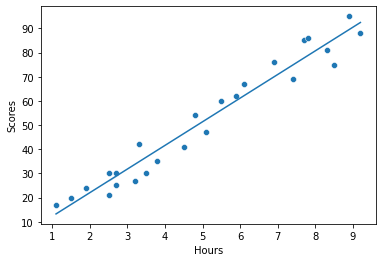

In [37]:
fig = plt.Figure()
yaxis = (final_model.predict(X))
sns.lineplot(x=df['Hours'],y=yaxis)
sns.scatterplot(x=df['Hours'],y=df['Scores'])

## Final Prediction
What will be the predicted score if a student studies for 9.25hrs/day ?

In [38]:
final_result = final_model.predict(np.array([9.25]).reshape(1,-1))

In [39]:
print("Prediction for 9.25hrs/day : {}".format(final_result[0]))

Prediction for 9.25hrs/day : 92.9098547701573
